# Horizon Europe Funding Analysis - Group 22

# 0. Setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# 1. Data Loading
- Load CORDIS datasets
- Explore initial data

In [2]:
projects = pd.read_csv(
    'Data/project.csv',
    encoding='utf-8',
    sep=';',                # Ensure the separator is a comma
    quotechar='"',          # Handle quoted fields correctly
    on_bad_lines='skip',    # Skip malformed lines instead of crashing
    engine='python'         # Use the Python engine (more forgiving than C)
    )

In [3]:
organizations = pd.read_csv('Data/organization.csv', encoding='utf-8', sep=';', quotechar='"', on_bad_lines='skip', engine='python')
deliverables = pd.read_csv('Data/projectDeliverables.csv', encoding='utf-8', sep=';', quotechar='"', on_bad_lines='skip', engine='python')
publications = pd.read_csv('Data/projectPublications.csv', encoding='utf-8', sep=';', quotechar='"', on_bad_lines='skip', engine='python')
reports = pd.read_csv('Data/reportSummaries.csv', encoding='utf-8', sep=';', quotechar='"', on_bad_lines='skip', engine='python')
euroscivoc = pd.read_csv('Data/euroSciVoc.csv', encoding='utf-8', sep=';', quotechar='"', on_bad_lines='skip', engine='python')

In [4]:
projects

,id,acronym,status,title,startDate,endDate,totalCost,ecMaxContribution,legalBasis,topics,ecSignatureDate,frameworkProgramme,masterCall,subCall,fundingScheme,nature,objective,contentUpdateDate,rcn,grantDoi
0,101116741,DOE,SIGNED,Digitizing Other Economies: A Comparative Appr...,2024-02-01,2029-01-31,1499998,1499998,HORIZON.1.1,ERC-2023-STG,2023-12-15,HORIZON,ERC-2023-STG,ERC-2023-STG,HORIZON-ERC,NaN,"How do longstanding, primarily non-industrial,...",2023-12-26 14:40:12,259247,10.3030/101116741
1,101163161,IRASTRO,SIGNED,MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...,2025-08-01,2031-07-31,12085363,12085363,HORIZON.1.1,ERC-2024-SyG,2025-02-20,HORIZON,ERC-2024-SyG,ERC-2024-SyG,HORIZON-ERC-SYG,NaN,The James Webb Space Telescope (JWST) has ushe...,2025-02-24 17:23:14,268970,10.3030/101163161
2,101160499,In-phase,SIGNED,Multiscale modelling of aberrant phase transit...,2025-06-01,2030-05-31,1489128,1489128,HORIZON.1.1,ERC-2024-STG,2025-02-19,HORIZON,ERC-2024-STG,ERC-2024-STG,HORIZON-ERC,NaN,The spatiotemporal organization of the cell ma...,2025-02-24 17:23:11,268969,10.3030/101160499
3,101166905,mw-atlas,SIGNED,The first comprehensive Atlas of the Milky Way,2025-05-01,2031-04-30,9957560,9957560,HORIZON.1.1,ERC-2024-SyG,2025-02-20,HORIZON,ERC-2024-SyG,ERC-2024-SyG,HORIZON-ERC-SYG,NaN,The Milky Way is the cosmic environment in whi...,2025-02-24 17:23:01,268971,10.3030/101166905
4,101162875,MAtCHLESS,SIGNED,Untapping multiparametric 2D luminescence sens...,2025-03-01,2030-02-28,1500000,1500000,HORIZON.1.1,ERC-2024-STG,2025-02-18,HORIZON,ERC-2024-STG,ERC-2024-STG,HORIZON-ERC,NaN,Cellular organisms are complex machines whose ...,2025-02-24 17:23:12,268966,10.3030/101162875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14738,101114220,ModelMe,CLOSED,Deployment of ModelMe Innovation,2023-07-01,2024-01-31,0,75000,HORIZON.3.2,HORIZON-EIE-2022-SCALEUP-02-02,2023-06-01,HORIZON,HORIZON-EIE-2022-SCALEUP-02,HORIZON-EIE-2022-SCALEUP-02,HORIZON-CSA,NaN,The primary objective of the work performed wi...,2023-08-29 02:07:50,251278,10.3030/101114220
14739,101114193,Cogo,SIGNED,Cogo - all ride in one app. Cogo gathers elect...,2023-07-01,2024-06-30,0,75000,HORIZON.3.2,HORIZON-EIE-2022-SCALEUP-02-02,2023-06-19,HORIZON,HORIZON-EIE-2022-SCALEUP-02,HORIZON-EIE-2022-SCALEUP-02,HORIZON-CSA,NaN,Bibi Blomqvist co-founder and COO of Cogo ApS....,2023-06-28 17:04:41,251243,10.3030/101114193
14740,101114191,HORIZER,CLOSED,HORIZER,2023-07-01,2024-03-31,0,75000,HORIZON.3.2,HORIZON-EIE-2022-SCALEUP-02-02,2023-06-05,HORIZON,HORIZON-EIE-2022-SCALEUP-02,HORIZON-EIE-2022-SCALEUP-02,HORIZON-CSA,NaN,"In Women TechEU, HORIZER aims, over the next 9...",2023-07-25 09:52:28,254814,10.3030/101114191
14741,101114035,iComplai,CLOSED,AI-powered early warning and surveillance syst...,2023-07-01,2024-03-31,0,75000,HORIZON.3.2,HORIZON-EIE-2022-SCALEUP-02-02,2023-06-01,HORIZON,HORIZON-EIE-2022-SCALEUP-02,HORIZON-EIE-2022-SCALEUP-02,HORIZON-CSA,NaN,A product recall is the process of retrieving ...,2023-06-28 17:02:39,251210,10.3030/101114035


In [5]:
organizations

,projectID,projectAcronym,organisationID,vatNumber,name,shortName,SME,activityType,street,postCode,...,contactForm,contentUpdateDate,rcn,order,role,ecContribution,netEcContribution,totalCost,endOfParticipation,active
0,101116741,DOE,999981634,NL811383696B01,WAGENINGEN UNIVERSITY,WU,False,HES,DROEVENDAALSESTEEG 4,6708 PB,...,https://ec.europa.eu/info/funding-tenders/oppo...,2023-12-26 14:40:12,1906458,1,coordinator,1499998.00,1499998.00,1499998,False,NaN
1,101163161,IRASTRO,999997736,DK31119103,AARHUS UNIVERSITET,AU,False,HES,NORDRE RINGGADE 1,8000,...,https://ec.europa.eu/info/funding-tenders/oppo...,2025-02-24 17:23:14,1905956,2,participant,4246240.00,4246240.00,4246240,False,NaN
2,101163161,IRASTRO,999854855,DE138408327,UNIVERSITAET POTSDAM,UP,False,HES,AM NEUEN PALAIS 10,14469,...,https://ec.europa.eu/info/funding-tenders/oppo...,2025-02-24 17:23:14,1908936,3,participant,1982813.00,1982813.00,1982813,False,NaN
3,101163161,IRASTRO,999990267,DE129517720,MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISS...,MPG,False,REC,HOFGARTENSTRASSE 8,80539,...,https://ec.europa.eu/info/funding-tenders/oppo...,2025-02-24 17:23:14,1949732,1,coordinator,5856310.00,5856310.00,5856310,False,NaN
4,101160499,In-phase,999874546,ESQ2818014I,UNIVERSIDAD COMPLUTENSE DE MADRID,UCM,False,HES,AVENIDA DE SENECA 2,28040,...,https://ec.europa.eu/info/funding-tenders/oppo...,2025-02-24 17:23:11,1906229,1,coordinator,1489128.00,1489128.00,1489128,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100059,101121353,E2i,958284438,GB437607048,GREATER MANCHESTER POLICE,GMP,False,PUB,"SALFORD CIVIC CENTER, CHORLEY ROAD",M27 50A,...,https://ec.europa.eu/info/funding-tenders/oppo...,2023-08-10 18:08:28,1946979,5,associatedPartner,NaN,0.00,0,False,NaN
100060,101121353,E2i,908208188,NaN,DPT - DEUTSCHER PRAVENTIONSTAG,GERMAN CONGRESS ON CRIME PREVENTION,False,OTH,AACHENER STRASSE 1064,50858,...,https://ec.europa.eu/info/funding-tenders/oppo...,2023-08-10 18:08:28,1946983,4,participant,311172.50,311172.50,"311172,5",False,NaN
100061,101121353,E2i,951909016,DE811435081,LANDESKRIMINALAMT NIEDERSACHSEN,LKA NIEDERSACHSEN,False,PUB,Am Waterlooplatz 11,30169,...,https://ec.europa.eu/info/funding-tenders/oppo...,2023-08-10 18:08:28,1946981,3,participant,262848.75,262848.75,"262848,75",False,NaN
100062,101121353,E2i,984074410,IL941002495,BEZALEL ACADEMY OF ARTS AND DESIGN,NaN,False,HES,SHMUEL HANAGID STREET 10,91240,...,https://ec.europa.eu/info/funding-tenders/oppo...,2023-08-10 18:08:28,1933629,2,participant,358562.50,358562.50,"358562,5",False,NaN


In [6]:
deliverables

,id,title,deliverableType,description,projectID,projectAcronym,url,collection,contentUpdateDate,rcn
0,190136266_5_DELIVHORIZON,Project webpage and logo,"Websites, patent fillings, videos etc.",Project webpage and logo,190136266,Deepstroke-Acc,https://ec.europa.eu/research/participants/doc...,Project deliverable,2024-01-31 13:50:03,1038413
1,190177099_5_DELIVHORIZON,White paper on sustainable space technologies,"Documents, reports",White paper on sustainable space technologies,190177099,Aurora Plasma Brake (APB),https://ec.europa.eu/research/participants/doc...,Project deliverable,2024-03-28 13:26:00,1067360
2,101129658_11_DELIVHORIZON,Dissemination and Communication Plan,"Documents, reports",Planning and reporting of compilation of SPATR...,101129658,SPATRA,https://ec.europa.eu/research/participants/doc...,Project deliverable,2024-05-06 11:02:10,1090541
3,101129658_4_DELIVHORIZON,Requirements and use cases specifications,"Documents, reports",Report on defined requirements to be fulfilled...,101129658,SPATRA,https://ec.europa.eu/research/participants/doc...,Project deliverable,2024-12-02 16:52:21,1213967
4,101129658_2_DELIVHORIZON,Risk management and project quality plan,"Documents, reports",Risk management and Quality Plan describing ge...,101129658,SPATRA,https://ec.europa.eu/research/participants/doc...,Project deliverable,2024-04-16 15:36:09,1079345
...,...,...,...,...,...,...,...,...,...,...
20631,101091749_33_DELIVHORIZON,Promotional films (No1),"Websites, patent fillings, videos etc.",Promotional films (No1),101091749,Demo-BLog,https://ec.europa.eu/research/participants/doc...,Project deliverable,2024-05-10 13:03:27,1092488
20632,101095207_2_DELIVHORIZON,Plan for dissemination and exploitation includ...,"Documents, reports",2.1: plan for dissemination and exploitation i...,101095207,THRILL,https://ec.europa.eu/research/participants/doc...,Project deliverable,2024-05-07 12:40:18,1092307
20633,101091749_25_DELIVHORIZON,"First release: Dissemination, Communication an...","Documents, reports","First release: Dissemination, Communication an...",101091749,Demo-BLog,https://ec.europa.eu/research/participants/doc...,Project deliverable,2024-05-10 13:03:29,1092503
20634,101079151_4_DELIVHORIZON,Report on G. Dambrine (CNRS) and S. Fatikow (U...,"Documents, reports",This report will contain the abstracts of two ...,101079151,GrInShield,https://ec.europa.eu/research/participants/doc...,Project deliverable,2024-05-10 16:17:17,1092820


In [7]:
publications

,id,title,isPublishedAs,authors,journalTitle,journalNumber,publishedYear,publishedPages,issn,isbn,doi,projectID,projectAcronym,collection,contentUpdateDate,rcn
0,101078482_120681_PUBLIHORIZON,Stronger 3-SUM Lower Bounds for Approximate Di...,Conference proceedings,"Abboud, Bringmann, Fischer",STOC 2023,NaN,2023,NaN,NaN,NaN,10.1145/3564246.3585240,101078482,CONJEXITY,Project publication,2025-02-24 09:17:57,1256166
1,101061687_117273_PUBLIHORIZON,Political narratives in representation: Maiden...,Peer reviewed articles,"LIZA MÜGGE, ZAHRA RUNDERKAMP",European Journal of Political Research,63,2024,NaN,0304-4130,NaN,10.1111/1475-6765.12632,101061687,PushBackLash,Project publication,2025-01-28 09:47:21,1246073
2,101104784_122330_PUBLIHORIZON,Implementing patient navigation for cancer pre...,Conference proceedings,"V Bempi, V Radaios, P Karnaki, D Zota, R Gómez...",European Journal of Public Health,34,2024,NaN,1101-1262,NaN,10.1093/eurpub/ckae144.1245,101104784,CO-CAPTAIN,Project publication,2025-02-10 08:14:06,1250879
3,101104784_122331_PUBLIHORIZON,Barriers and facilitators to healthcare servic...,Conference proceedings,"K Schäfer, M Wrzesińska, M Kostyła, N Mancebo ...",European Journal of Public Health,34,2024,NaN,1101-1262,NaN,10.1093/eurpub/ckae144.2230,101104784,CO-CAPTAIN,Project publication,2025-02-10 08:14:08,1250892
4,101104784_122328_PUBLIHORIZON,Reducing barriers and improving facilitators t...,Conference proceedings,"Igor Grabovac, Katrin Schäfer, Magdalena Wrzes...",Journal of Cancer Policy,NaN,2025,NaN,2213-5383,NaN,10.1016/j.jcpo.2024.100548,101104784,CO-CAPTAIN,Project publication,2025-02-10 08:14:07,1250891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21012,101042884_25092_PUBLIHORIZON,Specialized Networks for Social Cognition in t...,Peer reviewed articles,"Ben Deen, Caspar M. Schwiedrzik, Julia Sliwa, ...",Annual Review of Neuroscience,NaN,2023,NaN,1545-4126,NaN,10.1146/annurev-neuro-102522-121410,101042884,NEURO-SOCIETY,Project publication,2024-06-12 12:23:10,1093486
21013,101077855_21590_PUBLIHORIZON,Five priorities to advance transformative tran...,Peer reviewed articles,"Karoline Augenstein, David PM Lam, Andra-Ioana...",Current Opinion in Environmental Sustainability,68:101438,2024,NaN,1877-3443,NaN,10.1016/j.cosust.2024.101438,101077855,LEVER,Project publication,2024-04-01 11:26:09,1069568
21014,101069228_21400_PUBLIHORIZON,Removal of toxic metals from sewage sludge by ...,Peer reviewed articles,"MORALES ARTEAGA, Juan Francisco, VODNIK, Domin...",Science of the total environment,923,2024,NaN,1879-1026,NaN,10.1016/j.scitotenv.2024.171444,101069228,CAVIPHY,Project publication,2024-04-01 11:26:08,1069510
21015,101060809_11541_PUBLIHORIZON,European Journal of International Relations,Peer reviewed articles,Oliver P. Richmond; Sandra Pogodda; Gëzim Visoka,European Journal of International Relations,NaN,2023,NaN,1354-0661,NaN,10.1177/13540661231168772,101060809,EMBRACE,Project publication,2024-02-13 10:14:03,1042447


In [8]:
reports

,id,title,projectID,projectAcronym,attachment,contentUpdateDate,rcn
0,101113151_PSHORIZON,Periodic Reporting for period 1 - Strategic Sy...,101113151,Strategic Synergies,/docs/results/horizon/101113/101113151_PS/eit-...,2024-07-24 11:59:53,1134773
1,101113088_PSHORIZON,Periodic Reporting for period 1 - QSTACK (Low-...,101113088,QSTACK,NaN,2024-09-16 11:31:42,1166553
2,101112839_PSHORIZON,Periodic Reporting for period 1 - RoCCQeT (Rea...,101112839,RoCCQeT,/docs/results/horizon/101112/101112839_PS/pict...,2024-07-29 11:51:27,1138509
3,190163952_PSHORIZON,Periodic Reporting for period 1 - IO-PR (Silic...,190163952,IO-PR,/docs/results/horizon/190163/190163952_PS/pict...,2024-10-21 15:38:18,1175998
4,190184742_PSHORIZON,Periodic Reporting for period 1 - qc-rosa (a Q...,190184742,qc-rosa,NaN,2024-12-02 12:10:36,1213878
...,...,...,...,...,...,...,...
3510,101064341_PSHORIZON,Periodic Reporting for period 1 - SynapTau (Ta...,101064341,SynapTau,NaN,2023-10-19 12:45:28,993369
3511,101061596_PSHORIZON,Periodic Reporting for period 2 - FAWORIT 2022...,101061596,FAWORIT 2022-2023,/docs/results/horizon/101061/101061596_PS/4.jp...,2023-07-09 13:42:00,952756
3512,101039296_PSHORIZON,Periodic Reporting for period 1 - SELFRELIANCE...,101039296,SELFRELIANCE,NaN,2023-04-21 14:55:27,929543
3513,190148437_PSHORIZON,Periodic Reporting for period 1 - EDVance (EDV...,190148437,EDVance,NaN,2023-03-03 18:03:40,915657


In [9]:
euroscivoc

,projectID,euroSciVocCode,euroSciVocPath,euroSciVocTitle,euroSciVocDescription
0,101116741,/29/97/543,/social sciences/political sciences/government...,government systems,NaN
1,101163161,/27/81/30021/30833628,"/agricultural sciences/agriculture, forestry, ...",grains and oilseeds,NaN
2,101163161,/23/43/251/48354418,/natural sciences/physical sciences/optics/mic...,microscopy,NaN
3,101163161,/23/43/257/761,/natural sciences/physical sciences/astronomy/...,astrochemistry,NaN
4,101163161,/29/89,/social sciences/law,law,NaN
...,...,...,...,...,...
38784,101071191,/23/47/297/933/1589,/natural sciences/computer and information sci...,deep learning,NaN
38785,101114487,/21/39/211,/medical and health sciences/clinical medicine...,dermatology,NaN
38786,101114060,/21/39/697,/medical and health sciences/clinical medicine...,obstetrics,NaN
38787,101114240,/21/39/235,/medical and health sciences/clinical medicine...,psychiatry,NaN


# 2. Data Cleaning & Preprocessing
- Handle missing values
- Feature Engineering

### 2.1 Projects

In [10]:
projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14743 entries, 0 to 14742
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  14743 non-null  int64  
 1   acronym             14743 non-null  object 
 2   status              14743 non-null  object 
 3   title               14743 non-null  object 
 4   startDate           14743 non-null  object 
 5   endDate             14743 non-null  object 
 6   totalCost           14743 non-null  object 
 7   ecMaxContribution   14743 non-null  object 
 8   legalBasis          14743 non-null  object 
 9   topics              14743 non-null  object 
 10  ecSignatureDate     14742 non-null  object 
 11  frameworkProgramme  14743 non-null  object 
 12  masterCall          14743 non-null  object 
 13  subCall             14743 non-null  object 
 14  fundingScheme       14742 non-null  object 
 15  nature              0 non-null      float64
 16  obje

##### Type conversion

In [11]:
projects['startDate'] = pd.to_datetime(projects['startDate'])
projects['endDate'] = pd.to_datetime(projects['endDate'])
projects['contentUpdateDate'] = pd.to_datetime(projects['contentUpdateDate'])

In [12]:
projects['totalCost'] = projects['totalCost'].str.replace(',', '.', regex=False).astype(float)
projects['ecMaxContribution'] = projects['ecMaxContribution'].str.replace(',', '.', regex=False).astype(float)

##### Select relevant features

In [13]:
project_features = ['id', 'acronym', 'title', 'topics', 'objective', 'startDate', 'endDate','ecSignatureDate', 'totalCost', 'ecMaxContribution', 'legalBasis', 'masterCall', 'fundingScheme', 'rcn', 'grantDoi', 'status']
projects = projects[project_features]

##### Missing values

In [14]:
projects

,id,acronym,title,topics,objective,startDate,endDate,ecSignatureDate,totalCost,ecMaxContribution,legalBasis,masterCall,fundingScheme,rcn,grantDoi,status
0,101116741,DOE,Digitizing Other Economies: A Comparative Appr...,ERC-2023-STG,"How do longstanding, primarily non-industrial,...",2024-02-01,2029-01-31,2023-12-15,1499998.0,1499998.0,HORIZON.1.1,ERC-2023-STG,HORIZON-ERC,259247,10.3030/101116741,SIGNED
1,101163161,IRASTRO,MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...,ERC-2024-SyG,The James Webb Space Telescope (JWST) has ushe...,2025-08-01,2031-07-31,2025-02-20,12085363.0,12085363.0,HORIZON.1.1,ERC-2024-SyG,HORIZON-ERC-SYG,268970,10.3030/101163161,SIGNED
2,101160499,In-phase,Multiscale modelling of aberrant phase transit...,ERC-2024-STG,The spatiotemporal organization of the cell ma...,2025-06-01,2030-05-31,2025-02-19,1489128.0,1489128.0,HORIZON.1.1,ERC-2024-STG,HORIZON-ERC,268969,10.3030/101160499,SIGNED
3,101166905,mw-atlas,The first comprehensive Atlas of the Milky Way,ERC-2024-SyG,The Milky Way is the cosmic environment in whi...,2025-05-01,2031-04-30,2025-02-20,9957560.0,9957560.0,HORIZON.1.1,ERC-2024-SyG,HORIZON-ERC-SYG,268971,10.3030/101166905,SIGNED
4,101162875,MAtCHLESS,Untapping multiparametric 2D luminescence sens...,ERC-2024-STG,Cellular organisms are complex machines whose ...,2025-03-01,2030-02-28,2025-02-18,1500000.0,1500000.0,HORIZON.1.1,ERC-2024-STG,HORIZON-ERC,268966,10.3030/101162875,SIGNED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14738,101114220,ModelMe,Deployment of ModelMe Innovation,HORIZON-EIE-2022-SCALEUP-02-02,The primary objective of the work performed wi...,2023-07-01,2024-01-31,2023-06-01,0.0,75000.0,HORIZON.3.2,HORIZON-EIE-2022-SCALEUP-02,HORIZON-CSA,251278,10.3030/101114220,CLOSED
14739,101114193,Cogo,Cogo - all ride in one app. Cogo gathers elect...,HORIZON-EIE-2022-SCALEUP-02-02,Bibi Blomqvist co-founder and COO of Cogo ApS....,2023-07-01,2024-06-30,2023-06-19,0.0,75000.0,HORIZON.3.2,HORIZON-EIE-2022-SCALEUP-02,HORIZON-CSA,251243,10.3030/101114193,SIGNED
14740,101114191,HORIZER,HORIZER,HORIZON-EIE-2022-SCALEUP-02-02,"In Women TechEU, HORIZER aims, over the next 9...",2023-07-01,2024-03-31,2023-06-05,0.0,75000.0,HORIZON.3.2,HORIZON-EIE-2022-SCALEUP-02,HORIZON-CSA,254814,10.3030/101114191,CLOSED
14741,101114035,iComplai,AI-powered early warning and surveillance syst...,HORIZON-EIE-2022-SCALEUP-02-02,A product recall is the process of retrieving ...,2023-07-01,2024-03-31,2023-06-01,0.0,75000.0,HORIZON.3.2,HORIZON-EIE-2022-SCALEUP-02,HORIZON-CSA,251210,10.3030/101114035,CLOSED


14 743 rows
- 1 missing ecSignatureDate
- 1 missing fundingScheme
- 57 missing grantDoi

### 2.2 Organizations

In [15]:
organizations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100064 entries, 0 to 100063
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   projectID           100064 non-null  int64  
 1   projectAcronym      100064 non-null  object 
 2   organisationID      100064 non-null  int64  
 3   vatNumber           84722 non-null   object 
 4   name                100064 non-null  object 
 5   shortName           74573 non-null   object 
 6   SME                 99801 non-null   object 
 7   activityType        100041 non-null  object 
 8   street              99764 non-null   object 
 9   postCode            99281 non-null   object 
 10  city                99801 non-null   object 
 11  country             100051 non-null  object 
 12  nutsCode            99786 non-null   object 
 13  geolocation         99477 non-null   object 
 14  organizationURL     61171 non-null   object 
 15  contactForm         100064 non-nul

#### Select relevant features

In [16]:
organizations_features = ['projectID', 'projectAcronym', 'organisationID', 'name', 'SME', 'activityType', 'country', 'city', 'contentUpdateDate', 'endOfParticipation', 'rcn', 'ecContribution',  'netEcContribution', 'totalCost']
organizations = organizations.loc[:, organizations_features]

In [17]:
organizations

,projectID,projectAcronym,organisationID,name,SME,activityType,country,city,contentUpdateDate,endOfParticipation,rcn,ecContribution,netEcContribution,totalCost
0,101116741,DOE,999981634,WAGENINGEN UNIVERSITY,False,HES,NL,Wageningen,2023-12-26 14:40:12,False,1906458,1499998.00,1499998.00,1499998
1,101163161,IRASTRO,999997736,AARHUS UNIVERSITET,False,HES,DK,Aarhus C,2025-02-24 17:23:14,False,1905956,4246240.00,4246240.00,4246240
2,101163161,IRASTRO,999854855,UNIVERSITAET POTSDAM,False,HES,DE,Potsdam,2025-02-24 17:23:14,False,1908936,1982813.00,1982813.00,1982813
3,101163161,IRASTRO,999990267,MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISS...,False,REC,DE,Munchen,2025-02-24 17:23:14,False,1949732,5856310.00,5856310.00,5856310
4,101160499,In-phase,999874546,UNIVERSIDAD COMPLUTENSE DE MADRID,False,HES,ES,Madrid,2025-02-24 17:23:11,False,1906229,1489128.00,1489128.00,1489128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100059,101121353,E2i,958284438,GREATER MANCHESTER POLICE,False,PUB,UK,Manchester,2023-08-10 18:08:28,False,1946979,NaN,0.00,0
100060,101121353,E2i,908208188,DPT - DEUTSCHER PRAVENTIONSTAG,False,OTH,DE,Koln,2023-08-10 18:08:28,False,1946983,311172.50,311172.50,"311172,5"
100061,101121353,E2i,951909016,LANDESKRIMINALAMT NIEDERSACHSEN,False,PUB,DE,Hannover,2023-08-10 18:08:28,False,1946981,262848.75,262848.75,"262848,75"
100062,101121353,E2i,984074410,BEZALEL ACADEMY OF ARTS AND DESIGN,False,HES,IL,Jerusalem,2023-08-10 18:08:28,False,1933629,358562.50,358562.50,"358562,5"


#### Type conversion

In [18]:
organizations['contentUpdateDate'] = pd.to_datetime(organizations['contentUpdateDate'])

In [19]:
organizations['totalCost'] = organizations['totalCost'].str.replace(',', '.', regex=False).astype(float)

#### Missing values

100 064 rows
- < 1% country & city
- 16% missing ecContribution
- < 1% netEcContribution

### 2.3 Deliverables

In [20]:
deliverables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20636 entries, 0 to 20635
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 20636 non-null  object
 1   title              20636 non-null  object
 2   deliverableType    20601 non-null  object
 3   description        20621 non-null  object
 4   projectID          20636 non-null  int64 
 5   projectAcronym     20636 non-null  object
 6   url                20635 non-null  object
 7   collection         20636 non-null  object
 8   contentUpdateDate  20636 non-null  object
 9   rcn                20636 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 1.6+ MB


#### Select relevant features

In [21]:
deliverables_features = ['id', 'title', 'deliverableType', 'description', 'projectID', 'contentUpdateDate', 'rcn']
deliverables = deliverables.loc[:, deliverables_features]

#### Missing values


In [22]:
deliverables

,id,title,deliverableType,description,projectID,contentUpdateDate,rcn
0,190136266_5_DELIVHORIZON,Project webpage and logo,"Websites, patent fillings, videos etc.",Project webpage and logo,190136266,2024-01-31 13:50:03,1038413
1,190177099_5_DELIVHORIZON,White paper on sustainable space technologies,"Documents, reports",White paper on sustainable space technologies,190177099,2024-03-28 13:26:00,1067360
2,101129658_11_DELIVHORIZON,Dissemination and Communication Plan,"Documents, reports",Planning and reporting of compilation of SPATR...,101129658,2024-05-06 11:02:10,1090541
3,101129658_4_DELIVHORIZON,Requirements and use cases specifications,"Documents, reports",Report on defined requirements to be fulfilled...,101129658,2024-12-02 16:52:21,1213967
4,101129658_2_DELIVHORIZON,Risk management and project quality plan,"Documents, reports",Risk management and Quality Plan describing ge...,101129658,2024-04-16 15:36:09,1079345
...,...,...,...,...,...,...,...
20631,101091749_33_DELIVHORIZON,Promotional films (No1),"Websites, patent fillings, videos etc.",Promotional films (No1),101091749,2024-05-10 13:03:27,1092488
20632,101095207_2_DELIVHORIZON,Plan for dissemination and exploitation includ...,"Documents, reports",2.1: plan for dissemination and exploitation i...,101095207,2024-05-07 12:40:18,1092307
20633,101091749_25_DELIVHORIZON,"First release: Dissemination, Communication an...","Documents, reports","First release: Dissemination, Communication an...",101091749,2024-05-10 13:03:29,1092503
20634,101079151_4_DELIVHORIZON,Report on G. Dambrine (CNRS) and S. Fatikow (U...,"Documents, reports",This report will contain the abstracts of two ...,101079151,2024-05-10 16:17:17,1092820


- < 35% deliverable type
- < 1% description


### 2.4 Publications

In [23]:
publications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21017 entries, 0 to 21016
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 21017 non-null  object
 1   title              21017 non-null  object
 2   isPublishedAs      21017 non-null  object
 3   authors            20961 non-null  object
 4   journalTitle       19323 non-null  object
 5   journalNumber      9288 non-null   object
 6   publishedYear      21017 non-null  int64 
 7   publishedPages     6 non-null      object
 8   issn               15152 non-null  object
 9   isbn               864 non-null    object
 10  doi                19113 non-null  object
 11  projectID          21017 non-null  int64 
 12  projectAcronym     21017 non-null  object
 13  collection         21017 non-null  object
 14  contentUpdateDate  21017 non-null  object
 15  rcn                21017 non-null  int64 
dtypes: int64(3), object(13)
memory usage: 2.

#### Select relevant features

In [24]:
publications_features = ['id', 'title', 'isPublishedAs', 'journalTitle', 'publishedYear', 'projectID', 'contentUpdateDate', 'rcn']
publications = publications.loc[:, publications_features]

#### Missing values

In [25]:
publications

,id,title,isPublishedAs,journalTitle,publishedYear,projectID,contentUpdateDate,rcn
0,101078482_120681_PUBLIHORIZON,Stronger 3-SUM Lower Bounds for Approximate Di...,Conference proceedings,STOC 2023,2023,101078482,2025-02-24 09:17:57,1256166
1,101061687_117273_PUBLIHORIZON,Political narratives in representation: Maiden...,Peer reviewed articles,European Journal of Political Research,2024,101061687,2025-01-28 09:47:21,1246073
2,101104784_122330_PUBLIHORIZON,Implementing patient navigation for cancer pre...,Conference proceedings,European Journal of Public Health,2024,101104784,2025-02-10 08:14:06,1250879
3,101104784_122331_PUBLIHORIZON,Barriers and facilitators to healthcare servic...,Conference proceedings,European Journal of Public Health,2024,101104784,2025-02-10 08:14:08,1250892
4,101104784_122328_PUBLIHORIZON,Reducing barriers and improving facilitators t...,Conference proceedings,Journal of Cancer Policy,2025,101104784,2025-02-10 08:14:07,1250891
...,...,...,...,...,...,...,...,...
21012,101042884_25092_PUBLIHORIZON,Specialized Networks for Social Cognition in t...,Peer reviewed articles,Annual Review of Neuroscience,2023,101042884,2024-06-12 12:23:10,1093486
21013,101077855_21590_PUBLIHORIZON,Five priorities to advance transformative tran...,Peer reviewed articles,Current Opinion in Environmental Sustainability,2024,101077855,2024-04-01 11:26:09,1069568
21014,101069228_21400_PUBLIHORIZON,Removal of toxic metals from sewage sludge by ...,Peer reviewed articles,Science of the total environment,2024,101069228,2024-04-01 11:26:08,1069510
21015,101060809_11541_PUBLIHORIZON,European Journal of International Relations,Peer reviewed articles,European Journal of International Relations,2023,101060809,2024-02-13 10:14:03,1042447



- 8% journal title

### 2.5 Report summaries

In [26]:
reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3515 entries, 0 to 3514
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 3515 non-null   object
 1   title              3515 non-null   object
 2   projectID          3515 non-null   int64 
 3   projectAcronym     3515 non-null   object
 4   attachment         1757 non-null   object
 5   contentUpdateDate  3515 non-null   object
 6   rcn                3515 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 192.4+ KB


#### Select relevant features

In [27]:
reports_features = ['id', 'title', 'projectID', 'contentUpdateDate', 'rcn']
reports = reports.loc[:, reports_features]

In [28]:
reports

,id,title,projectID,contentUpdateDate,rcn
0,101113151_PSHORIZON,Periodic Reporting for period 1 - Strategic Sy...,101113151,2024-07-24 11:59:53,1134773
1,101113088_PSHORIZON,Periodic Reporting for period 1 - QSTACK (Low-...,101113088,2024-09-16 11:31:42,1166553
2,101112839_PSHORIZON,Periodic Reporting for period 1 - RoCCQeT (Rea...,101112839,2024-07-29 11:51:27,1138509
3,190163952_PSHORIZON,Periodic Reporting for period 1 - IO-PR (Silic...,190163952,2024-10-21 15:38:18,1175998
4,190184742_PSHORIZON,Periodic Reporting for period 1 - qc-rosa (a Q...,190184742,2024-12-02 12:10:36,1213878
...,...,...,...,...,...
3510,101064341_PSHORIZON,Periodic Reporting for period 1 - SynapTau (Ta...,101064341,2023-10-19 12:45:28,993369
3511,101061596_PSHORIZON,Periodic Reporting for period 2 - FAWORIT 2022...,101061596,2023-07-09 13:42:00,952756
3512,101039296_PSHORIZON,Periodic Reporting for period 1 - SELFRELIANCE...,101039296,2023-04-21 14:55:27,929543
3513,190148437_PSHORIZON,Periodic Reporting for period 1 - EDVance (EDV...,190148437,2023-03-03 18:03:40,915657


### 2.6 European science vocabulary

In [29]:
euroscivoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38789 entries, 0 to 38788
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   projectID              38789 non-null  int64  
 1   euroSciVocCode         38789 non-null  object 
 2   euroSciVocPath         38789 non-null  object 
 3   euroSciVocTitle        38789 non-null  object 
 4   euroSciVocDescription  0 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ MB


#### Select relevant features

In [30]:
euroscivoc_features = ['projectID', 'euroSciVocPath']
euroscivoc = euroscivoc.loc[:, euroscivoc_features]

In [31]:
euroscivoc

,projectID,euroSciVocPath
0,101116741,/social sciences/political sciences/government...
1,101163161,"/agricultural sciences/agriculture, forestry, ..."
2,101163161,/natural sciences/physical sciences/optics/mic...
3,101163161,/natural sciences/physical sciences/astronomy/...
4,101163161,/social sciences/law
...,...,...
38784,101071191,/natural sciences/computer and information sci...
38785,101114487,/medical and health sciences/clinical medicine...
38786,101114060,/medical and health sciences/clinical medicine...
38787,101114240,/medical and health sciences/clinical medicine...


# 3. Feature Engineering

## 3.1 Understanding Financial Fields: Project vs Organization Level



#### Project level
| Column               | Meaning |
|----------------------|---------|
| `totalCost`          | The full cost of the project (across all funding sources — EU + others) |
| `ecMaxContribution`  | The maximum EU funding allocated to the project |

This means:
- `ecMaxContribution ≤ totalCost`

#### Organization level (multiple orgs per project)
| Column               | Meaning |
|----------------------|---------|
| `ecContribution`     | EU contribution allocated to that organization (may include funds for third parties) |
| `netEcContribution`  | Actual EU money retained by the organization (after transferring/receiving funds) |
| `totalCost`          | Total cost incurred by the organization (EU-funded or otherwise) |

You would expect:
- `Σ ecContribution ≈ ecMaxContribution`
- `Σ totalCost (orgs) ≈ totalCost (project)`
- `ecContribution ≥ netEcContribution`

In [32]:
# Step 1: Aggregate org-level data by project
org_agg = organizations.groupby("projectID").agg({
    "ecContribution": "sum",
    "netEcContribution": "sum",
    "totalCost": "sum"
}).rename(columns={
    "ecContribution": "sum_ecContribution",
    "netEcContribution": "sum_netEcContribution",
    "totalCost": "sum_org_totalCost"
})

In [33]:
# Step 2: Select financial fields from projects
project_subset = projects[["id", "acronym", "ecMaxContribution", "totalCost"]].copy()
project_subset = project_subset.rename(columns={
    "totalCost": "project_totalCost"
})


In [34]:
# Step 3: Merge
project_financials = (
    project_subset
    .set_index("id")
    .join(org_agg)
    .reset_index()
)

In [35]:
# Step 4: Compute differences
project_financials["ec_diff"] = project_financials["ecMaxContribution"] - project_financials["sum_ecContribution"]
project_financials["cost_diff"] = project_financials["project_totalCost"] - project_financials["sum_org_totalCost"]
project_financials["net_vs_ec_diff"] = project_financials["sum_ecContribution"] - project_financials["sum_netEcContribution"]

In [36]:
# Preview
project_financials.head()


,id,acronym,ecMaxContribution,project_totalCost,sum_ecContribution,sum_netEcContribution,sum_org_totalCost,ec_diff,cost_diff,net_vs_ec_diff
0,101116741,DOE,1499998.0,1499998.0,1499998.0,1499998.0,1499998.0,0.0,0.0,0.0
1,101163161,IRASTRO,12085363.0,12085363.0,12085363.0,12085363.0,12085363.0,0.0,0.0,0.0
2,101160499,In-phase,1489128.0,1489128.0,1489128.0,1489128.0,1489128.0,0.0,0.0,0.0
3,101166905,mw-atlas,9957560.0,9957560.0,9957560.0,9957560.0,9957560.0,0.0,0.0,0.0
4,101162875,MAtCHLESS,1500000.0,1500000.0,1500000.0,1500000.0,1500000.0,0.0,0.0,0.0


In [37]:
project_financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14743 entries, 0 to 14742
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14743 non-null  int64  
 1   acronym                14743 non-null  object 
 2   ecMaxContribution      14743 non-null  float64
 3   project_totalCost      14743 non-null  float64
 4   sum_ecContribution     14740 non-null  float64
 5   sum_netEcContribution  14740 non-null  float64
 6   sum_org_totalCost      14740 non-null  float64
 7   ec_diff                14740 non-null  float64
 8   cost_diff              14740 non-null  float64
 9   net_vs_ec_diff         14740 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.1+ MB


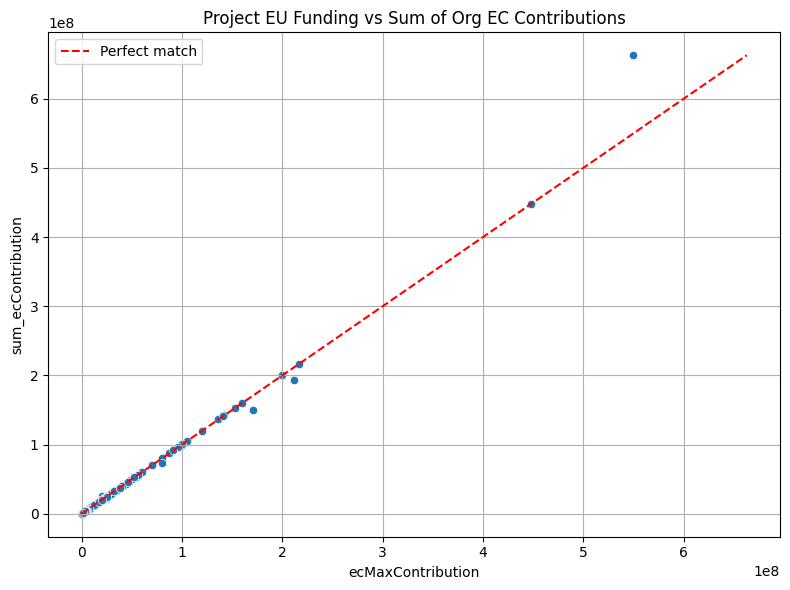

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter points
sns.scatterplot(
    data=project_financials,
    x="ecMaxContribution",
    y="sum_ecContribution",
    ax=ax
)

# Diagonal line (x = y)
min_val = min(project_financials["ecMaxContribution"].min(), project_financials["sum_ecContribution"].min())
max_val = max(project_financials["ecMaxContribution"].max(), project_financials["sum_ecContribution"].max())
ax.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Perfect match")

# Labels and grid
ax.set_title("Project EU Funding vs Sum of Org EC Contributions")
ax.set_xlabel("ecMaxContribution")
ax.set_ylabel("sum_ecContribution")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

**Observation:**  
Most points lie close to the diagonal, indicating strong alignment.  
Two large projects (over €400M) deviate slightly, suggesting minor inconsistencies.

/var/folders/l8/ftm6dgxs31x_ztyt958ndqt00000gn/T/ipykernel_42939/2247539423.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette="Blues")
/var/folders/l8/ftm6dgxs31x_ztyt958ndqt00000gn/T/ipykernel_42939/2247539423.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


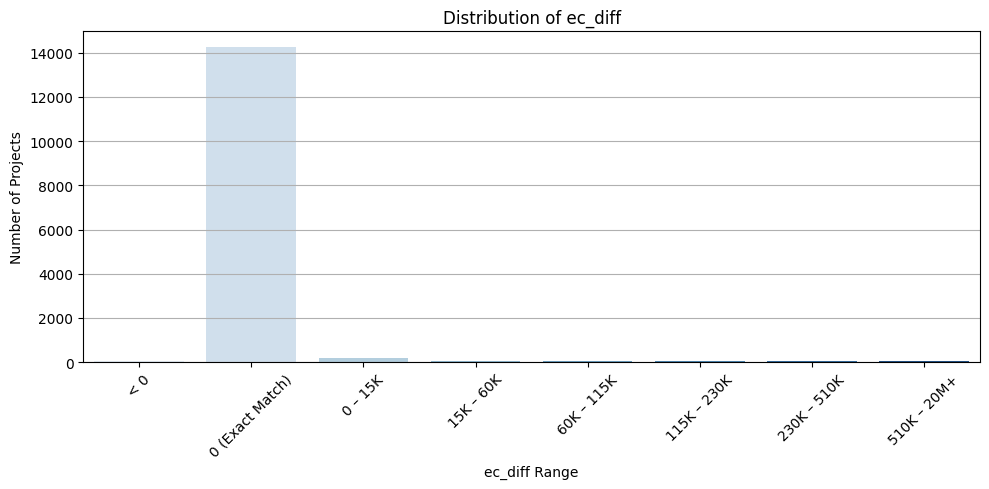

In [39]:
df = project_financials.copy()
df = df[df["ec_diff"].notna()]
df_zero = df[df["ec_diff"] == 0].copy()
df_nonzero = df[df["ec_diff"] != 0].copy()

# Bin edges (rounded manually)
bin_edges = [-120_000_000, -1e-9, 15_000, 60_000, 115_000, 230_000, 510_000, 20_000_000]
bin_labels = ["< 0", "0 – 15K", "15K – 60K", "60K – 115K", "115K – 230K", "230K – 510K", "510K – 20M+"]
df_nonzero["bin_label"] = pd.cut(df_nonzero["ec_diff"], bins=bin_edges, labels=bin_labels)

df_zero["bin_label"] = "0 (Exact Match)"
df_combined = pd.concat([df_zero, df_nonzero])

# Count per bin
bin_order = ["< 0", "0 (Exact Match)"] + bin_labels[1:]
counts = df_combined["bin_label"].value_counts().reindex(bin_order)

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=counts.index, y=counts.values, ax=ax, palette="Blues")
ax.set_title("Distribution of ec_diff")
ax.set_ylabel("Number of Projects")
ax.set_xlabel("ec_diff Range")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.grid(axis="y")
plt.tight_layout()
plt.show()

**Observation:**  
14,258 projects report an exact match (`ec_diff = 0`).  
Others are distributed across bins from underfunding to excess EU funding (up to €20M).

/var/folders/l8/ftm6dgxs31x_ztyt958ndqt00000gn/T/ipykernel_42939/2226813095.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette="Greens")
/var/folders/l8/ftm6dgxs31x_ztyt958ndqt00000gn/T/ipykernel_42939/2226813095.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


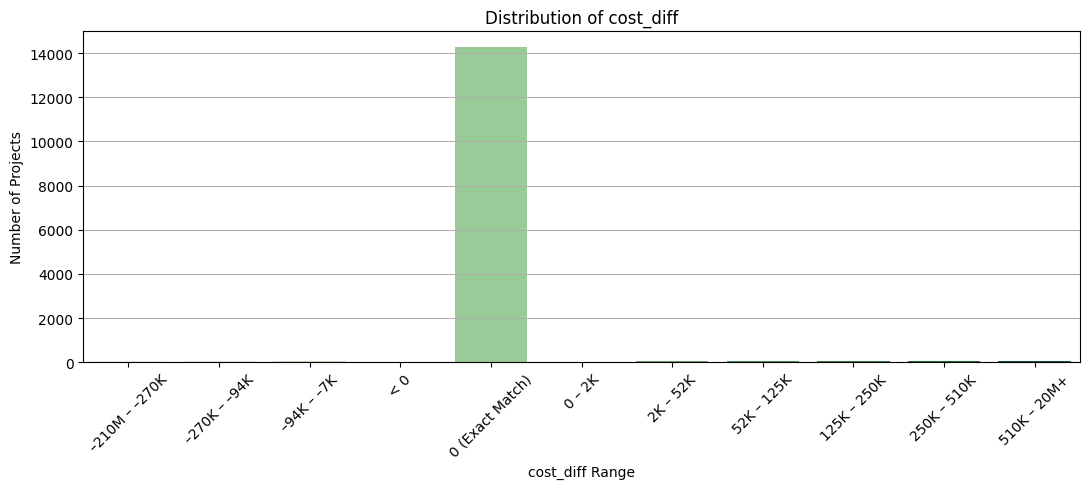

In [40]:
df = project_financials.copy()
df = df[df["cost_diff"].notna()]
df_zero = df[df["cost_diff"] == 0].copy()
df_nonzero = df[df["cost_diff"] != 0].copy()

# Custom bin edges + labels
bin_edges = [-210_000_000, -270_000, -94_000, -7_000, 0, 2_000, 52_000, 125_000, 250_000, 510_000, 20_000_000]
bin_labels = ["–210M – –270K", "–270K – –94K", "–94K – –7K", "< 0", "0 – 2K", "2K – 52K", "52K – 125K", "125K – 250K", "250K – 510K", "510K – 20M+"]
df_nonzero["bin_label"] = pd.cut(df_nonzero["cost_diff"], bins=bin_edges, labels=bin_labels)

df_zero["bin_label"] = "0 (Exact Match)"
df_combined = pd.concat([df_zero, df_nonzero])

bin_order = ["–210M – –270K", "–270K – –94K", "–94K – –7K", "< 0", "0 (Exact Match)", "0 – 2K", "2K – 52K", "52K – 125K", "125K – 250K", "250K – 510K", "510K – 20M+"]
counts = df_combined["bin_label"].value_counts().reindex(bin_order)

# Plot
fig, ax = plt.subplots(figsize=(11, 5))
sns.barplot(x=counts.index, y=counts.values, ax=ax, palette="Greens")
ax.set_title("Distribution of cost_diff")
ax.set_ylabel("Number of Projects")
ax.set_xlabel("cost_diff Range")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.grid(axis="y")
plt.tight_layout()
plt.show()

**Observation:**  
14,271 projects show exact cost match.  
Others range from major underreporting (up to €-200M) to overreporting (€20M+).


## 3.2 EuroSciVoc Topic

Extracts the X-th level label from the euroSciVocPath and returns a dataframe with projectID and the corresponding euroSciVoc label at that level.

In [41]:
level = 3

In [42]:
# Split the path into a list of URIs
euroscivoc["path_list"] = euroscivoc["euroSciVocPath"].str.split("/")

# Extract X-th element from path
euroscivoc["esv_topic"] = euroscivoc["path_list"].apply(lambda path: path[level - 1] if len(path) >= level else path[level-2])

In [43]:
euroscivoc

,projectID,euroSciVocPath,path_list,esv_topic
0,101116741,/social sciences/political sciences/government...,"[, social sciences, political sciences, govern...",political sciences
1,101163161,"/agricultural sciences/agriculture, forestry, ...","[, agricultural sciences, agriculture, forestr...","agriculture, forestry, and fisheries"
2,101163161,/natural sciences/physical sciences/optics/mic...,"[, natural sciences, physical sciences, optics...",physical sciences
3,101163161,/natural sciences/physical sciences/astronomy/...,"[, natural sciences, physical sciences, astron...",physical sciences
4,101163161,/social sciences/law,"[, social sciences, law]",law
...,...,...,...,...
38784,101071191,/natural sciences/computer and information sci...,"[, natural sciences, computer and information ...",computer and information sciences
38785,101114487,/medical and health sciences/clinical medicine...,"[, medical and health sciences, clinical medic...",clinical medicine
38786,101114060,/medical and health sciences/clinical medicine...,"[, medical and health sciences, clinical medic...",clinical medicine
38787,101114240,/medical and health sciences/clinical medicine...,"[, medical and health sciences, clinical medic...",clinical medicine


## 3.3 Derived features

In [44]:
projects["duration_days"] = (projects["endDate"] - projects["startDate"]).dt.days

/var/folders/l8/ftm6dgxs31x_ztyt958ndqt00000gn/T/ipykernel_42939/2537391321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  projects["duration_days"] = (projects["endDate"] - projects["startDate"]).dt.days


In [45]:
projects['funding_ratio'] = projects['ecMaxContribution']/projects['totalCost']

/var/folders/l8/ftm6dgxs31x_ztyt958ndqt00000gn/T/ipykernel_42939/1401505452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  projects['funding_ratio'] = projects['ecMaxContribution']/projects['totalCost']


## 3.4 Project-level aggregations

In [46]:
# 3. Aggregate orgs
org_counts = organizations.groupby("projectID").size().rename("num_organisations")

In [47]:
num_smes = organizations[organizations["SME"] == True].groupby("projectID").size().rename("num_smes")

In [48]:
# One-hot encode activityType
activity_dummies = pd.get_dummies(organizations["activityType"])
activity_dummies["projectID"] = organizations["projectID"]
project_activity_flags = activity_dummies.groupby("projectID").max().astype(bool)  # 1 if present, 0 if not

In [49]:
num_deliverables = deliverables.groupby("projectID").size().rename("num_deliverables")
num_publications = publications.groupby("projectID").size().rename("num_publications")
num_reports = reports.groupby("projectID").size().rename("num_reports")

## 3.5 Merging Data

In [57]:
# Start with the base projects table
projects_enriched = projects.copy()

# Set 'id' as index for consistent merging (optional but clean)
projects_enriched = projects_enriched.set_index("id")

In [58]:
# Merge all your per-project features
projects_enriched = projects_enriched.join(num_deliverables, on="id")
projects_enriched = projects_enriched.join(num_publications, on="id")
projects_enriched = projects_enriched.join(num_reports, on="id")
projects_enriched = projects_enriched.join(project_activity_flags, on="id")
projects_enriched = projects_enriched.join(num_smes, on="id")
projects_enriched = projects_enriched.join(org_counts, on="id")

In [59]:
# Fill missing values where needed
projects_enriched["num_deliverables"] = projects_enriched["num_deliverables"].fillna(0).astype(int)
projects_enriched["num_publications"] = projects_enriched["num_publications"].fillna(0).astype(int)
projects_enriched["num_reports"] = projects_enriched["num_reports"].fillna(0).astype(int)
projects_enriched["num_smes"] = projects_enriched["num_smes"].fillna(0).astype(int)
projects_enriched["num_organisations"] = projects_enriched["num_organisations"].fillna(0).astype(int)

In [60]:
# Select only the columns that are sums over orgs
org_aggregates = project_financials[[
    "id",
    "sum_ecContribution",
    "sum_netEcContribution",
    "sum_org_totalCost"
]].copy()

# Rename columns to clarify they are org-level sums
org_aggregates = org_aggregates.rename(columns={
    "sum_ecContribution": "org_sum_ecContribution",
    "sum_netEcContribution": "org_sum_netEcContribution",
    "sum_org_totalCost": "org_sum_totalCost"
})

# Merge into projects_enriched using 'id'
projects_enriched = projects_enriched.merge(org_aggregates, on="id", how="left")

In [61]:
projects_enriched = projects_enriched.join(euroscivoc.set_index("projectID")['esv_topic'], on="id")  # topic_df from EuroSciVoc

In [62]:
# Reset index to restore 'id' as column if desired
projects_enriched = projects_enriched.reset_index()


In [63]:
projects_enriched

,index,id,acronym,title,topics,objective,startDate,endDate,ecSignatureDate,totalCost,...,OTH,PRC,PUB,REC,num_smes,num_organisations,org_sum_ecContribution,org_sum_netEcContribution,org_sum_totalCost,esv_topic
0,0,101116741,DOE,Digitizing Other Economies: A Comparative Appr...,ERC-2023-STG,"How do longstanding, primarily non-industrial,...",2024-02-01,2029-01-31,2023-12-15,1499998.0,...,False,False,False,False,0,1,1499998.0,1499998.0,1499998.0,political sciences
1,1,101163161,IRASTRO,MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...,ERC-2024-SyG,The James Webb Space Telescope (JWST) has ushe...,2025-08-01,2031-07-31,2025-02-20,12085363.0,...,False,False,False,True,0,3,12085363.0,12085363.0,12085363.0,"agriculture, forestry, and fisheries"
2,1,101163161,IRASTRO,MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...,ERC-2024-SyG,The James Webb Space Telescope (JWST) has ushe...,2025-08-01,2031-07-31,2025-02-20,12085363.0,...,False,False,False,True,0,3,12085363.0,12085363.0,12085363.0,physical sciences
3,1,101163161,IRASTRO,MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...,ERC-2024-SyG,The James Webb Space Telescope (JWST) has ushe...,2025-08-01,2031-07-31,2025-02-20,12085363.0,...,False,False,False,True,0,3,12085363.0,12085363.0,12085363.0,physical sciences
4,1,101163161,IRASTRO,MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...,ERC-2024-SyG,The James Webb Space Telescope (JWST) has ushe...,2025-08-01,2031-07-31,2025-02-20,12085363.0,...,False,False,False,True,0,3,12085363.0,12085363.0,12085363.0,law
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39115,14738,101114220,ModelMe,Deployment of ModelMe Innovation,HORIZON-EIE-2022-SCALEUP-02-02,The primary objective of the work performed wi...,2023-07-01,2024-01-31,2023-06-01,0.0,...,False,True,False,False,1,1,75000.0,75000.0,0.0,NaN
39116,14739,101114193,Cogo,Cogo - all ride in one app. Cogo gathers elect...,HORIZON-EIE-2022-SCALEUP-02-02,Bibi Blomqvist co-founder and COO of Cogo ApS....,2023-07-01,2024-06-30,2023-06-19,0.0,...,False,True,False,False,1,1,75000.0,75000.0,0.0,NaN
39117,14740,101114191,HORIZER,HORIZER,HORIZON-EIE-2022-SCALEUP-02-02,"In Women TechEU, HORIZER aims, over the next 9...",2023-07-01,2024-03-31,2023-06-05,0.0,...,False,True,False,False,1,1,75000.0,75000.0,0.0,NaN
39118,14741,101114035,iComplai,AI-powered early warning and surveillance syst...,HORIZON-EIE-2022-SCALEUP-02-02,A product recall is the process of retrieving ...,2023-07-01,2024-03-31,2023-06-01,0.0,...,False,True,False,False,1,1,75000.0,75000.0,0.0,NaN


## 3.6 Save dataframes as pickle files for Shiny dashboard

In [64]:
projects_enriched.to_pickle('Data/PE.pkl')

In [65]:
project_financials.to_pickle("Data/finance.pkl")

## X. Exploratory Data Analysis (EDA) --> Shiny Dashboard
- Funding by field
- Funding by country
- Gini coefficients
- Mapping

#### Merging

In [ ]:
#Now I want to add a column to the projects dataframe that contains information on the country based on the project ID.

projects.rename(columns={"id": "projectID"}, inplace=True)


projects = projects.merge(
    organizations[["projectID", "country"]],
    on="projectID",
    how="left"
)

projects.info()
projects.head()

In [ ]:
# Group by country and summarize total and average ecMaxContribution
funding_summary = (
    projects.groupby("country")["ecMaxContribution"]
    .agg(["count", "sum", "mean"])
    .reset_index()
    .rename(columns={"count": "project_count", "sum": "total_funding", "mean": "avg_funding"})
)

print(funding_summary)

In [ ]:
import pycountry

def alpha2_to_alpha3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Apply to your dataframe
funding_summary["iso_alpha"] = funding_summary["country"].apply(alpha2_to_alpha3)

# Fix known missing ones
funding_summary.loc[funding_summary["country"] == "XK", "iso_alpha"] = "XKX"  # Kosovo

funding_summary.head()

In [ ]:
import pandas as pd

def get_funding_summary():
    df = pd.read_csv("Data/projects.csv")  # or do your full processing here
    summary = df.groupby("country")["ecMaxContribution"].agg(["count", "sum", "mean"]).reset_index()
    summary.columns = ["country", "project_count", "total_funding", "avg_funding"]
    return summary

### 3.1 Financial features

In [38]:
org_financials = organizations.groupby('projectID', as_index=False)[
    ['ecContribution', 'netEcContribution', 'totalCost']
].sum()

org_financials = org_financials.merge(
    projects[['id', 'ecMaxContribution']],
    left_on='projectID',
    right_on='id',
    how='left'
)
org_financials = org_financials.drop(columns=['id'], axis=1)
org_financials

,projectID,ecContribution,netEcContribution,totalCost,ecMaxContribution
0,101039048,1496205.0,1496205.0,1496205.00,1496205.0
1,101039060,1499150.0,1499150.0,1499150.00,1499150.0
2,101039066,1482050.0,1482050.0,1482050.00,1482050.0
3,101039090,1495000.0,1495000.0,1495000.00,1495000.0
4,101039098,1458688.0,1458688.0,1458688.00,1458688.0
...,...,...,...,...,...
15333,190198819,2402487.0,2402487.0,3432125.00,2402487.0
15334,190199097,1290322.0,1290322.0,1843318.54,1290322.0
15335,190199127,2495099.0,2495099.0,3564427.50,2495099.0
15336,190199469,2402750.0,2402750.0,3432500.00,2402750.0


##### EC max contribution (project) VS total cost (organizations)

In [ ]:
eq1 = (org_financials.totalCost == org_financials.ecMaxContribution)
eq1.value_counts()

In [ ]:
org_financials['ecMaxContribution'].fillna(0)
org_financials['total_diff'] = org_financials['totalCost'] - org_financials['ecMaxContribution']

In [ ]:
org_financials.total_diff.describe()

##### Net contribution (organizations) VS totalCost (organizations)

In [ ]:
d2 = organizations.totalCost - organizations.netEcContribution
d2.value_counts().sort_index()

## 4. Natural Language Processing (NLP)
- Keyword extraction
- Topic modeling
- Sentence embeddings

## 5. Machine Learning

### 5.1 Unsupervised Learning
- Clustering projects

### 5.2 Supervised Learning
- Predicting grant amounts
- Classifying high vs low funded projects
- Feature importance

## 6. Visuals/Dashboard
- Maps and Charts
- Dashboard structure

In [45]:
from shiny import App, ui, render, reactive
from shinywidgets import render_plotly
import plotly.express as px
import plotly.graph_objects as go

# --- Country data ---
countries_data = {
    "Andorra": 1, "United Arab Emirates": 5, "Afghanistan": 1, "Anguilla": 1, "Albania": 47, 
    "Armenia": 21, "Angola": 7, "Argentina": 108, "Austria": 2902, "Australia": 194, "Aruba": 2, 
    "Azerbaijan": 10, "Bosnia and Herzegovina": 54, "Bangladesh": 9, "Belgium": 5576, "Burkina Faso": 24, 
    "Bulgaria": 614, "Burundi": 6, "Benin": 10, "Bolivia": 7, "Bonaire, Sint Eustatius and Saba": 2, 
    "Brazil": 122, "Bhutan": 1, "Botswana": 6, "Canada": 227, "Democratic Republic of the Congo": 35, 
    "Central African Republic": 2, "Republic of the Congo": 5, "Switzerland": 2356, "Ivory Coast": 19, 
    "Chile": 59, "Cameroon": 19, "China": 212, "Colombia": 62, "Costa Rica": 13, "Cuba": 14, 
    "Cape Verde": 15, "Cyprus": 870, "Czech Republic": 1393, "Germany": 11264, "Djibouti": 1, 
    "Denmark": 2495, "Dominican Republic": 1, "Algeria": 8, "Ecuador": 11, "Estonia": 650, 
    "Egypt": 39, "Greece": 4498, "Spain": 11234, "Ethiopia": 50, "Finland": 2444, "Fiji": 1, 
    "Faroe Islands": 17, "France": 9380, "Gabon": 10, "Georgia": 48, "Ghana": 66, "Gibraltar": 1, 
    "Greenland": 12, "Gambia": 3, "Guinea": 7, "Equatorial Guinea": 1, "Guatemala": 2, "Guam": 1, 
    "Guinea-Bissau": 3, "Hong Kong": 10, "Croatia": 543, "Haiti": 1, "Hungary": 793, "Indonesia": 10, 
    "Ireland": 1893, "Israel": 877, "Isle of Man": 1, "India": 62, "Iraq": 2, "Iran": 4, "Iceland": 146, 
    "Italy": 9730, "Jordan": 9, "Japan": 136, "Kenya": 133, "Kyrgyzstan": 9, "Cambodia": 5, "South Korea": 75, 
    "Kuwait": 1, "Kazakhstan": 14, "Laos": 1, "Lebanon": 24, "Liechtenstein": 4, "Sri Lanka": 6, "Liberia": 5, 
    "Lesotho": 1, "Lithuania": 527, "Luxembourg": 460, "Latvia": 350, "Libya": 1, "Morocco": 62, "Monaco": 4, 
    "Moldova": 66, "Montenegro": 32, "Madagascar": 12, "Marshall Islands": 2, "North Macedonia": 71, 
    "Mali": 7, "Mongolia": 4, "Macau": 1, "Mauritania": 2, "Malta": 186, "Mauritius": 6, "Maldives": 1, 
    "Malawi": 8, "Mexico": 37, "Malaysia": 18, "Mozambique": 29, "Namibia": 8, "New Caledonia": 1, 
    "Niger": 1, "Nigeria": 47, "Nicaragua": 1, "Netherlands": 6319, "Norway": 2309, "Nepal": 2, 
    "New Zealand": 42, "Panama": 2, "Peru": 19, "French Polynesia": 3, "Papua New Guinea": 2, "Philippines": 11, 
    "Pakistan": 12, "Poland": 1787, "Palestine": 4, "Portugal": 2781, "Paraguay": 2, "Qatar": 1, 
    "Romania": 1099, "Serbia": 466, "Rwanda": 26, "Saudi Arabia": 8, "Sudan": 1, "Sweden": 2832, "Singapore": 24, 
    "Slovenia": 1097, "Slovakia": 430, "Sierra Leone": 2, "Senegal": 40, "Suriname": 1, "São Tomé and Príncipe": 6, 
    "El Salvador": 1, "Swaziland": 3, "Chad": 1, "Togo": 2, "Thailand": 46, "Tajikistan": 3, 
    "Turkmenistan": 2, "Tunisia": 69, "Turkey": 917, "Taiwan": 22, "Tanzania": 60, "Ukraine": 335, 
    "Uganda": 76, "United Kingdom": 4310, "United States": 1059, "Uruguay": 9, "Uzbekistan": 21, 
    "Vatican City": 1, "Venezuela": 1, "Vietnam": 18, "Kosovo": 16, "South Africa": 200, "Zambia": 22, "Zimbabwe": 5
}


# --- Filter helper ---
def filter_countries(min_obs):
    return [country for country, count in countries_data.items() if count >= min_obs]

# --- UI ---
app_ui = ui.page_fluid(
    ui.h2("CORDIS Horizon Europe Dashboard - Group 22"),

    ui.navset_tab(
        ui.nav_panel(
            "Country View",
            ui.layout_sidebar(
                ui.sidebar(
                    ui.input_slider("min_observations", "Minimum observations", min=1, max=200, value=100),
                    ui.output_ui("country_select")
                ),
                ui.div(
                    ui.output_plot("europe_map"),
                    ui.output_plot("funding_dist"),
                    ui.output_plot("nlp_pie")
                )
            )
        ),
        ui.nav_panel(
            "Cross-Country Comparison",
            ui.layout_sidebar(
                ui.sidebar(
                    ui.input_select("metric", "Compare countries by",
                                    choices=["Total Funding", "Number of Projects", "Average Contribution"])
                ),
                ui.div(
                    ui.output_plot("sankey_chart"),
                    ui.output_plot("comparison_chart")
                )
            )
        )
    )
)

# --- Server logic ---
def server(input, output, session):

    @reactive.Calc
    def filtered_countries():
        min_obs = input.min_observations()
        return [country for country, count in countries_data.items() if count >= min_obs]

    def country_select_ui():
        filtered = filtered_countries()
        return ui.input_select(
            "country",
            "Select a country",
            choices=filtered,
            selected=filtered[0] if filtered else None
        )

    output.country_select = render.ui(country_select_ui)

    def europe_map():
        df = px.data.gapminder().query("year == 2007 and continent == 'Europe'")
        fig = px.choropleth(df, locations="iso_alpha", color="gdpPercap",
                            hover_name="country", scope="europe")
        fig.update_layout(paper_bgcolor="white", plot_bgcolor="lightgrey")
        return fig

    def funding_dist():
        if "country" not in input:
            return go.Figure()
        df = px.data.tips()
        fig = px.histogram(df, x="tip", color_discrete_sequence=["grey"])
        fig.update_layout(title_text=f"Funding Distribution - {input.country()}")
        return fig

    def nlp_pie():
        if "country" not in input:
            return go.Figure()
        labels = ["Health", "AI", "Climate", "Transport"]
        values = [30, 25, 25, 20]
        fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
        fig.update_layout(title_text=f"Topic Distribution - {input.country()}")
        return fig

    def sankey_chart():
        fig = go.Figure(data=[go.Sankey(
            node=dict(
                label=["Country A", "Health", "AI"],
                pad=15, thickness=20, line=dict(color="black", width=0.5)
            ),
            link=dict(source=[0, 0], target=[1, 2], value=[8, 4])
        )])
        fig.update_layout(title_text="Sankey: Countries → Topics → Funding")
        return fig

    def comparison_chart():
        df = px.data.gapminder().query("year == 2007 and continent == 'Europe'")
        fig = px.bar(df, x="country", y="gdpPercap", title="Average Funding (placeholder)")
        return fig

    output.europe_map = render_plotly(europe_map)
    output.funding_dist = render_plotly(funding_dist)
    output.nlp_pie = render_plotly(nlp_pie)
    output.sankey_chart = render_plotly(sankey_chart)
    output.comparison_chart = render_plotly(comparison_chart)

# --- Launch app ---
app = App(app_ui, server)

## 7. Conclusion and Insights